In [747]:
def lstm_ts(dataset, step_size):
	data_X, data_Y = [], []
	for i in range(len(dataset)-step_size-1):
		a = dataset[i:(i+step_size), 0]
		data_X.append(a)
		data_Y.append(dataset[i + step_size, 0])
	return np.array(data_X), np.array(data_Y)

In [748]:
import pandas as pd
data = pd.DataFrame([10,20,30,40,50,60,70,80,90,100])
#x, y = lstm_ts(data,2)
#data = data(:,0)
#data[:,0].shape
#print(data)
type(data)

pandas.core.frame.DataFrame

In [749]:
print(x,y)

[[10 20]
 [20 30]
 [30 40]
 [40 50]
 [50 60]
 [60 70]
 [70 80]] [30 40 50 60 70 80 90]


In [750]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense,Activation,LSTM
import preprocessing

In [751]:
np.random.seed(7)

In [752]:
import pandas as pd
data = pd.read_csv("hdfc.csv",usecols=[9])

In [753]:
data.head()
type(data)

pandas.core.frame.DataFrame

In [754]:
data.shape

(497, 1)

In [755]:
data = data.reindex(index=data.index[: : -1])

In [756]:
data.head()

,Average Price
496,2037.46
495,2019.73
494,1979.73
493,1960.06
492,1956.38


In [757]:
idx = np.arange(1,len(data)+1,1)

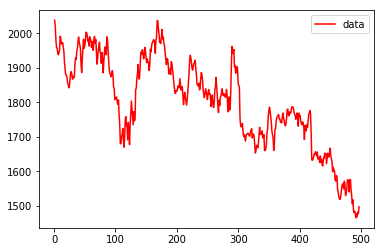

In [758]:
import matplotlib.pyplot as plt
plt.plot(idx,data,"r",label="data")
plt.legend(loc="upper right")
plt.show()

In [759]:
data = np.reshape(data,len(data),1)

In [760]:
data.shape

(497, 1)

In [761]:
scaler = MinMaxScaler(feature_range=(0,1))

In [762]:
data = scaler.fit_transform(data)

In [763]:
print(data)

[[1.        ]
 [0.96900675]
 [0.89908401]
 [0.86469951]
 [0.85826662]
 [0.8347551 ]
 [0.82563018]
 [0.83699262]
 [0.85116946]
 [0.91923924]
 [0.90806908]
 [0.87994266]
 [0.87971541]
 [0.88714471]
 [0.8630738 ]
 [0.84174737]
 [0.78607139]
 [0.75156452]
 [0.72469671]
 [0.72282628]
 [0.71398105]
 [0.68489319]
 [0.67513897]
 [0.6580079 ]
 [0.66505262]
 [0.6990001 ]
 [0.73618152]
 [0.73974758]
 [0.72766843]
 [0.70170961]
 [0.70693634]
 [0.71572912]
 [0.71116666]
 [0.77780303]
 [0.8093207 ]
 [0.80196133]
 [0.8420795 ]
 [0.85817921]
 [0.8930357 ]
 [0.91521868]
 [0.8899591 ]
 [0.87216376]
 [0.85720029]
 [0.77567038]
 [0.73515016]
 [0.80339475]
 [0.85382652]
 [0.90373387]
 [0.85824913]
 [0.87053806]
 [0.89612978]
 [0.9396392 ]
 [0.93761144]
 [0.9243436 ]
 [0.89424186]
 [0.90352411]
 [0.86955914]
 [0.91647729]
 [0.89985316]
 [0.9012691 ]
 [0.86372059]
 [0.89219662]
 [0.86046918]
 [0.84758592]
 [0.90668811]
 [0.91803307]
 [0.88394574]
 [0.90247526]
 [0.8363808 ]
 [0.77789043]
 [0.80467084]
 [0.84

In [764]:
train_data = int(len(data)*0.75)
test_data = len(data)-train_data

In [765]:
train_data, test_data = data[0:train_data,:], data[train_data:len(data),:]

In [766]:
trainx, trainy = lstm_ts(train_data,2)

In [767]:
testx, testy = lstm_ts(test_data,2)

In [768]:
type(trainx)

numpy.ndarray

In [769]:
trainx

array([[1.        , 0.96900675],
       [0.96900675, 0.89908401],
       [0.89908401, 0.86469951],
       [0.86469951, 0.85826662],
       [0.85826662, 0.8347551 ],
       [0.8347551 , 0.82563018],
       [0.82563018, 0.83699262],
       [0.83699262, 0.85116946],
       [0.85116946, 0.91923924],
       [0.91923924, 0.90806908],
       [0.90806908, 0.87994266],
       [0.87994266, 0.87971541],
       [0.87971541, 0.88714471],
       [0.88714471, 0.8630738 ],
       [0.8630738 , 0.84174737],
       [0.84174737, 0.78607139],
       [0.78607139, 0.75156452],
       [0.75156452, 0.72469671],
       [0.72469671, 0.72282628],
       [0.72282628, 0.71398105],
       [0.71398105, 0.68489319],
       [0.68489319, 0.67513897],
       [0.67513897, 0.6580079 ],
       [0.6580079 , 0.66505262],
       [0.66505262, 0.6990001 ],
       [0.6990001 , 0.73618152],
       [0.73618152, 0.73974758],
       [0.73974758, 0.72766843],
       [0.72766843, 0.70170961],
       [0.70170961, 0.70693634],
       [0.

In [770]:
trainx.shape

(369, 2)

In [771]:
testx.shape

(122, 2)

In [772]:
trainy.shape

(369,)

In [773]:
import numpy as np
trainx = np.reshape(trainx, (trainx.shape[0],1,trainx.shape[1]))
testx = np.reshape(testx, (testx.shape[0],1,testx.shape[1]))
step = 2


In [774]:
trainx.shape

(369, 1, 2)

In [775]:
model = Sequential()
model.add(LSTM(32,input_shape=(1,step),return_sequences=True))
model.add(LSTM(16))
model.add(Dense(1))
model.add(Activation('linear'))

In [776]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(trainx,trainy,epochs=100,batch_size=5,verbose=2)

Epoch 1/100
 - 5s - loss: 0.2636
Epoch 2/100
 - 0s - loss: 0.0081
Epoch 3/100
 - 0s - loss: 0.0058
Epoch 4/100
 - 0s - loss: 0.0048
Epoch 5/100
 - 0s - loss: 0.0040
Epoch 6/100
 - 0s - loss: 0.0032
Epoch 7/100
 - 0s - loss: 0.0028
Epoch 8/100
 - 0s - loss: 0.0024
Epoch 9/100
 - 0s - loss: 0.0024
Epoch 10/100
 - 0s - loss: 0.0021
Epoch 11/100
 - 0s - loss: 0.0021
Epoch 12/100
 - 0s - loss: 0.0021
Epoch 13/100
 - 0s - loss: 0.0021
Epoch 14/100
 - 0s - loss: 0.0020
Epoch 15/100
 - 0s - loss: 0.0021
Epoch 16/100
 - 0s - loss: 0.0021
Epoch 17/100
 - 0s - loss: 0.0020
Epoch 18/100
 - 0s - loss: 0.0021
Epoch 19/100
 - 0s - loss: 0.0020
Epoch 20/100
 - 0s - loss: 0.0020
Epoch 21/100
 - 0s - loss: 0.0021
Epoch 22/100
 - 0s - loss: 0.0020
Epoch 23/100
 - 0s - loss: 0.0020
Epoch 24/100
 - 1s - loss: 0.0020
Epoch 25/100
 - 0s - loss: 0.0020
Epoch 26/100
 - 0s - loss: 0.0021
Epoch 27/100
 - 0s - loss: 0.0019
Epoch 28/100
 - 0s - loss: 0.0019
Epoch 29/100
 - 0s - loss: 0.0019
Epoch 30/100
 - 0s - lo

In [777]:
train_predict = model.predict(trainx)
test_predict = model.predict(testx)


In [778]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
print(trainy.shape)
print(testy.shape)
trainy

(369,)
(122,)


array([0.89908401, 0.86469951, 0.85826662, 0.8347551 , 0.82563018,
       0.83699262, 0.85116946, 0.91923924, 0.90806908, 0.87994266,
       0.87971541, 0.88714471, 0.8630738 , 0.84174737, 0.78607139,
       0.75156452, 0.72469671, 0.72282628, 0.71398105, 0.68489319,
       0.67513897, 0.6580079 , 0.66505262, 0.6990001 , 0.73618152,
       0.73974758, 0.72766843, 0.70170961, 0.70693634, 0.71572912,
       0.71116666, 0.77780303, 0.8093207 , 0.80196133, 0.8420795 ,
       0.85817921, 0.8930357 , 0.91521868, 0.8899591 , 0.87216376,
       0.85720029, 0.77567038, 0.73515016, 0.80339475, 0.85382652,
       0.90373387, 0.85824913, 0.87053806, 0.89612978, 0.9396392 ,
       0.93761144, 0.9243436 , 0.89424186, 0.90352411, 0.86955914,
       0.91647729, 0.89985316, 0.9012691 , 0.86372059, 0.89219662,
       0.86046918, 0.84758592, 0.90668811, 0.91803307, 0.88394574,
       0.90247526, 0.8363808 , 0.77789043, 0.80467084, 0.84891445,
       0.86464706, 0.88864804, 0.83648568, 0.83470265, 0.78266

In [779]:
trainy = scaler.inverse_transform([trainy])
testy = scaler.inverse_transform([testy])

In [780]:
trainy

array([[1979.73, 1960.06, 1956.38, 1942.93, 1937.71, 1944.21, 1952.32,
        1991.26, 1984.87, 1968.78, 1968.65, 1972.9 , 1959.13, 1946.93,
        1915.08, 1895.34, 1879.97, 1878.9 , 1873.84, 1857.2 , 1851.62,
        1841.82, 1845.85, 1865.27, 1886.54, 1888.58, 1881.67, 1866.82,
        1869.81, 1874.84, 1872.23, 1910.35, 1928.38, 1924.17, 1947.12,
        1956.33, 1976.27, 1988.96, 1974.51, 1964.33, 1955.77, 1909.13,
        1885.95, 1924.99, 1953.84, 1982.39, 1956.37, 1963.4 , 1978.04,
        2002.93, 2001.77, 1994.18, 1976.96, 1982.27, 1962.84, 1989.68,
        1980.17, 1980.98, 1959.5 , 1975.79, 1957.64, 1950.27, 1984.08,
        1990.57, 1971.07, 1981.67, 1943.86, 1910.4 , 1925.72, 1951.03,
        1960.03, 1973.76, 1943.92, 1942.9 , 1913.13, 1943.93, 1923.88,
        1885.14, 1917.18, 1943.81, 1960.13, 1952.48, 1937.54, 1989.66,
        1982.42, 1949.63, 1920.81, 1892.65, 1882.83, 1880.34, 1873.76,
        1882.93, 1891.81, 1878.88, 1844.57, 1840.11, 1807.92, 1810.69,
      

In [781]:
trainy[0].shape

(369,)

In [782]:
train_predict.shape
type(train_predict)

numpy.ndarray

In [783]:
train_predict[:,0].shape

(369,)

In [784]:
import math
train_score = math.sqrt(mean_squared_error(trainy[0],train_predict[:,0]))
print("training score: %.2f" %(train_score))

training score: 22.16


In [785]:
test_score = math.sqrt(mean_squared_error(testy[0],test_predict[:,0]))
print("test score : %.2f" %(test_score))

test score : 26.83


In [786]:
train_predict_plot = np.empty_like(data)
train_predict_plot[:, :] = np.nan
train_predict_plot[step:len(train_predict)+step, :] = train_predict

In [787]:
test_predict_plot = np.empty_like(data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(step*2)+1:len(data)-1, :] = test_predict

In [788]:
data = scaler.inverse_transform(data)

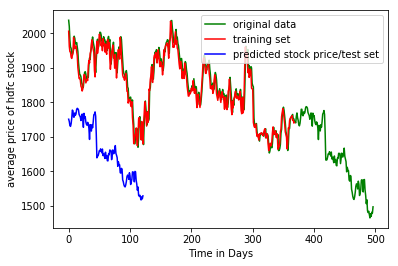

In [789]:
plt.plot(data, 'g', label = 'original data')
plt.plot(train_predict, 'r', label = 'training set')
plt.plot(test_predict, 'b', label = 'predicted stock price/test set')
plt.legend(loc = 'upper right')
plt.xlabel('Time in Days')
plt.ylabel('average price of hdfc stock')
plt.show()